<a href="https://colab.research.google.com/github/sivanujands/machinelearning-a-z/blob/main/CompleteMLProject/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Customer Churn Prediction Project Overview

#### This project aims to predict customer churn, i.e., the likelihood of customers discontinuing their service.  We'll use machine learning to analyze customer data and build a model that can identify at-risk customers.  This allows for proactive interventions to retain them, reducing revenue loss.

#### The dataset we have includes customer demographics and usage patterns.  We'll explore the data to understand the relationship between these factors and churn.  Then we'll use machine learning algorithms like Decision Trees, Random Forests, and XGBoost to build predictive models.  The model's performance will be evaluated using metrics such as accuracy, and we'll further explore techniques to optimize it.

## Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

### Data Loading Understanding

In [ ]:
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
pd.set_option('display.max_columns',None) #Showing all columns without trungated

In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### column `tenure` in month scale. not year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Drop `CustomerID` Column as this is not required for modelling

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df["gender"].value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:
df["SeniorCitizen"].unique()

array([0, 1])

### We Automate Above task using `for` Loop to find unique values for each columns

In [ ]:
for col in df.columns:
  print(col, df[col].unique())
  print("__"*50)

gender ['Female' 'Male']
____________________________________________________________________________________________________
SeniorCitizen [0 1]
____________________________________________________________________________________________________
Partner ['Yes' 'No']
____________________________________________________________________________________________________
Dependents ['No' 'Yes']
____________________________________________________________________________________________________
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
____________________________________________________________________________________________________
PhoneService ['No' 'Yes']
____________________________________________________________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
_

### Printing Only Categorical Features Unique Values

In [ ]:
numerical_features = ["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
  if col not in numerical_features:
    print(col, df[col].unique())
    print("__"*50)

gender ['Female' 'Male']
____________________________________________________________________________________________________
SeniorCitizen [0 1]
____________________________________________________________________________________________________
Partner ['Yes' 'No']
____________________________________________________________________________________________________
Dependents ['No' 'Yes']
____________________________________________________________________________________________________
PhoneService ['No' 'Yes']
____________________________________________________________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
____________________________________________________________________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
____________________________________________________________________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
______________________________________

### Checking Missing Values

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### Change the `TotalCharges` column datatype in a correct format

In [ ]:
df["TotalCharges"]= df["TotalCharges"].astype("float")

ValueError: could not convert string to float: ' '

In [ ]:
df[df["TotalCharges"]==" "] ##checking missing values in the column. in space format

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df["TotalCharges"]==" "])

11

#### Above scenario, can occur when customer in A FIRST Month, see `tenure` values, all are zero. its mean they not yet complete therir first month

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})

In [ ]:
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [ ]:
df["TotalCharges"].dtype #Now you can see we change the correct datatype format

dtype('float64')

### Checking the class distribution of the target column

In [ ]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### You can see that clear imbalance in the dataset according to our target columns. `No` values are higher than `Yes` values. So we cant train the model for this data. For that we want to do `Upper Sampling` or `Down Sampling`

Insights:

1. CustomerID Column removed as it is not required for modelling
2. No Missing Values in the Dataset
3. Missing Values in `TotalCharges` column were replace with 0
4. Class imbalance identified in target column

## Exploratory Data Analysis

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Numerical Features Analysis

### Understanding the Distribution of Numerical Features

In [ ]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")

  #Calculate Mean and Median of the Column
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #Add Vertical Line for mean and nedian
  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="-",label="Median")

  plt.legend()

  plt.show()

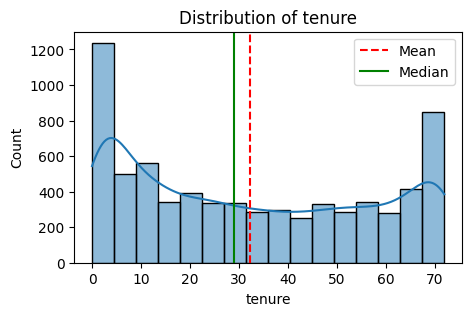

In [ ]:
plot_histogram(df, "tenure")

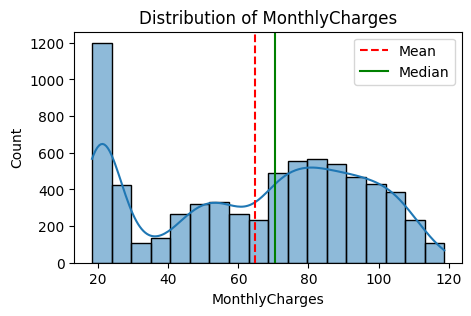

In [ ]:
plot_histogram(df, "MonthlyCharges")

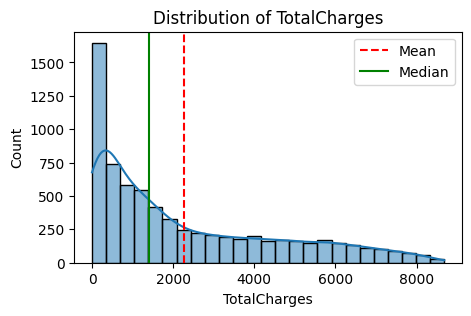

In [ ]:
plot_histogram(df, "TotalCharges")

### Commonly Models not work for above data didtribution. Because the dataset have some kind of skewness or outliers. Commonly models expect data should be distributed Normally or uniform Distribution. Actually Its Bell Curve.

### For maintain Normal Distribution Above plots, we should do Feature Scaling. Specially Standardization using standardscaler Technique. But in Tree Based model, we dont need to do feature scale. Still its perform well.

### But WHEN its come to Logistic Regression, SVM classification Model, We must do feature scaling to maintain Normal Distribution. Its improve the Model Performance

## Box Plot - for Identify Outliers

In [ ]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

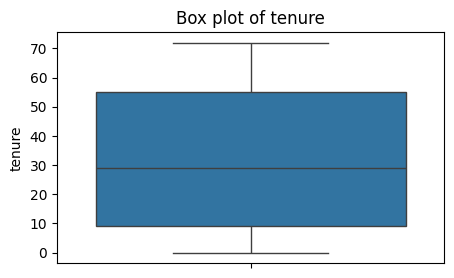

In [ ]:
plot_boxplot(df,'tenure')

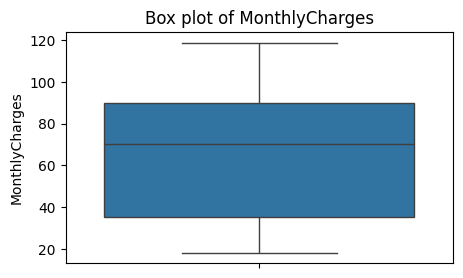

In [ ]:
plot_boxplot(df,'MonthlyCharges')

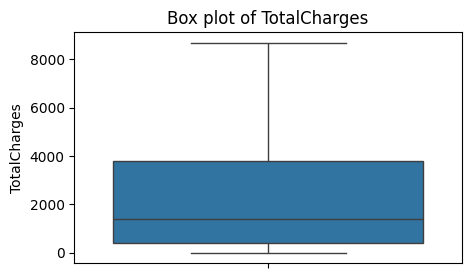

In [ ]:
plot_boxplot(df,'TotalCharges')

## Corelation HeatMap

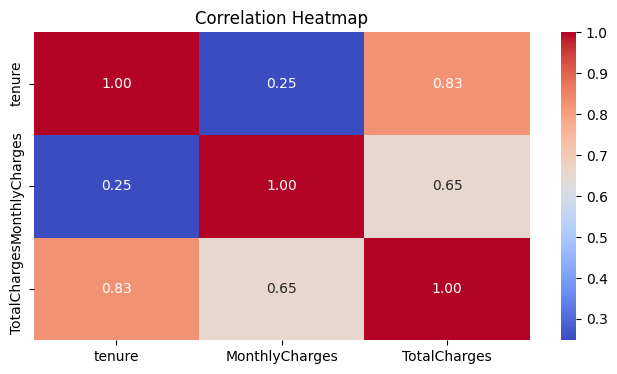

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### In this first try you can see above heat map that `tenure` and `TotalCharges` are higly correlated.(0.83). So this is have correlation. Actually columns dont have corelation each other. If its, then model output have some bias. So your second try you can drop either of these column and work again to see the model performance.

## Categorical Features Analysis

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## Count Plot for Categorical Values

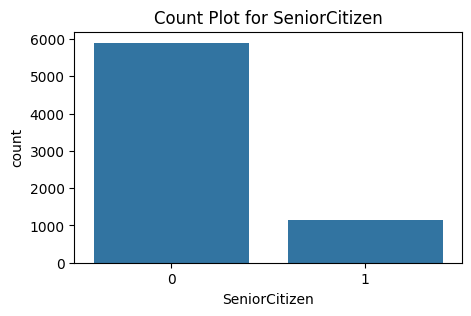

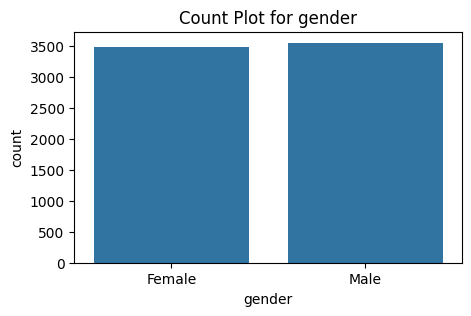

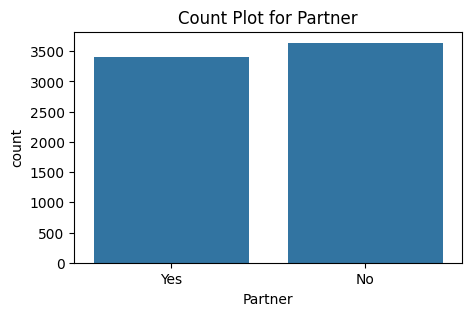

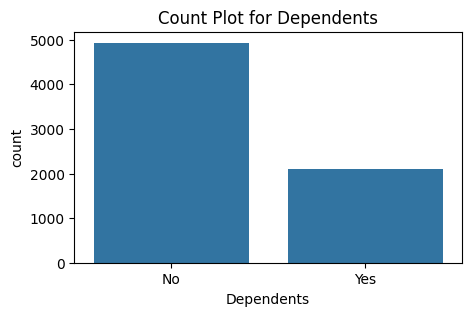

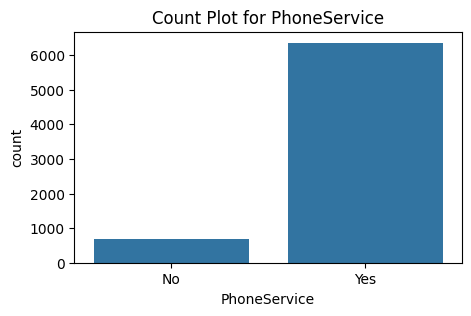

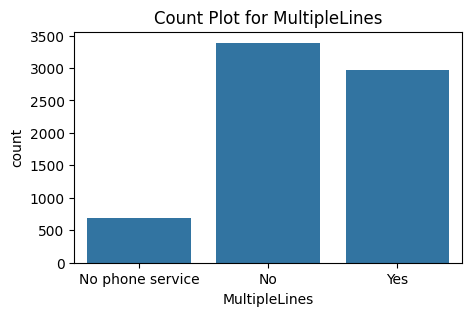

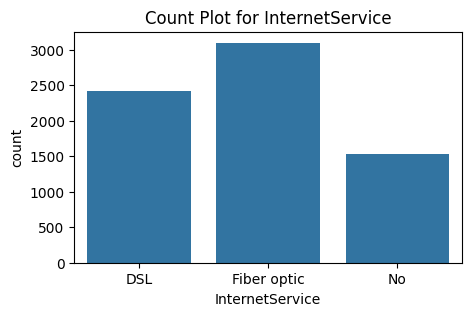

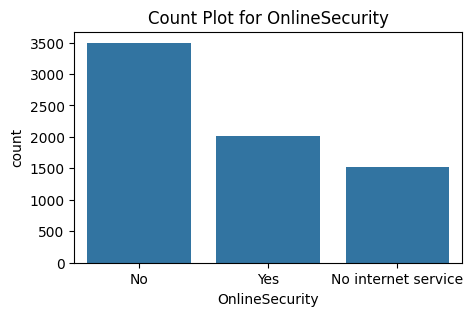

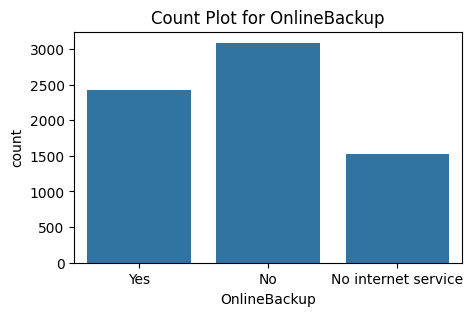

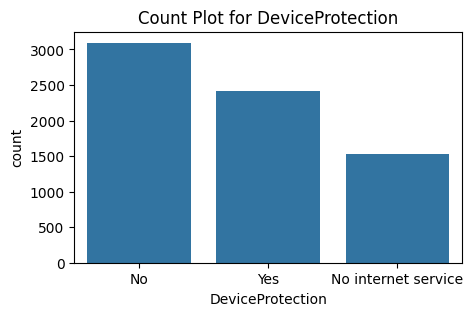

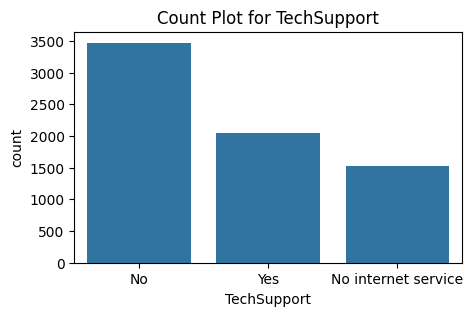

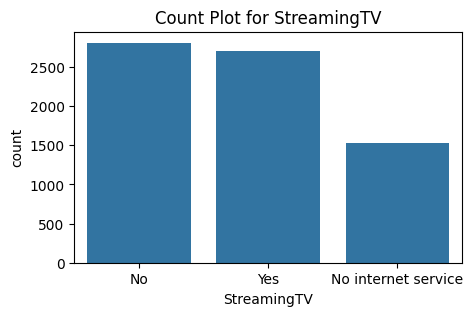

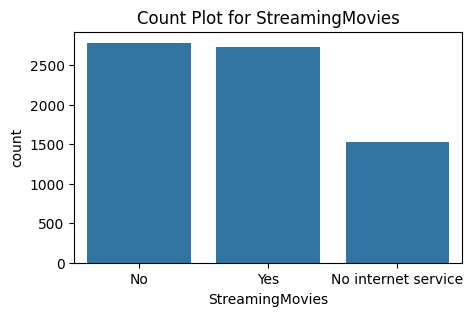

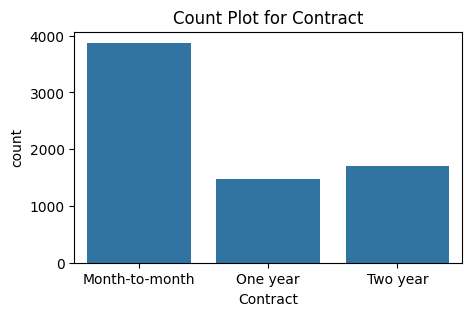

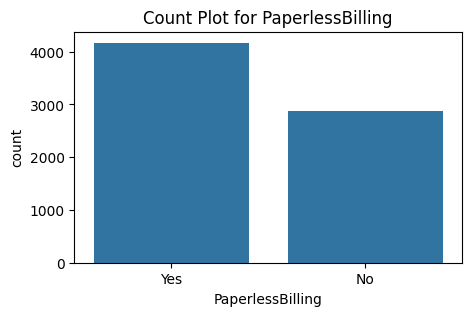

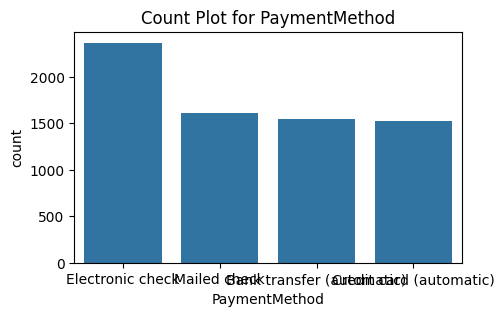

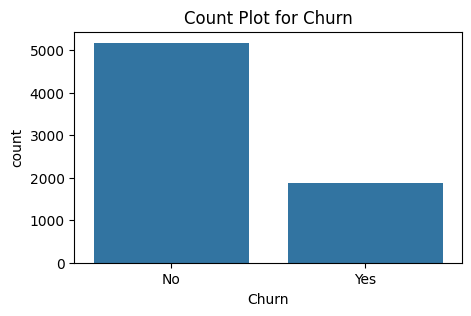

In [ ]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.show()

### Our target column `Churn` . this column is imbalaced. if we use this data to model. its affect the model output. So we want to work on this column. Thats why we wrote this line of code. `from imblearn.over_sampling import SMOTE`

## Data Pre-Processing

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Label Encoding for Target column

In [ ]:
df["Churn"] = df["Churn"].replace({"No":0,"Yes":1})

<ipython-input-119-3e50715b7583>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"No":0,"Yes":1})


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


### Label Encoding for Categorical Features

In [ ]:
#Identifying columns with object datatypes
object_cols = df.select_dtypes(include="object").columns
object_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
encoders = {}

#apply label encoding and store the encoders
for col in object_cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  encoders[col] = encoder

# save the encoder to the pickle file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Features and Target

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


### Split Training and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(5634, 19)

In [ ]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


### still our target variable class values are imbalanced

## Synthetic Minority Oversampling TEchnique (SMOTE)

SMOTE only done for Training Set

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


## ModelTraining

Training with Hyperparameters

In [ ]:
#Dictonary of models
model = {
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "XGBClassifier":XGBClassifier(random_state=42)
}

In [ ]:
#Dictonary to store cross validation score
cv_score = {}

#perform 5-fold cross validation for each model
for model_name, model in model.items():
  print(f"Training {model_name} with default parameters")
  scores  = cross_val_score(model,X_train_smote,y_train_smote,cv=5, scoring="accuracy")
  cv_score[model_name] = scores
  print(f"{model_name} Cross validation accuracy: {np.mean(scores):.2f}")
  print("__"*50)

Training DecisionTree with default parameters
DecisionTree Cross validation accuracy: 0.78
____________________________________________________________________________________________________
Training RandomForest with default parameters
RandomForest Cross validation accuracy: 0.84
____________________________________________________________________________________________________
Training XGBClassifier with default parameters
XGBClassifier Cross validation accuracy: 0.83
____________________________________________________________________________________________________


In [ ]:
cv_score #Actually we got avergae above

{'DecisionTree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'RandomForest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBClassifier': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

#### Random Forest Gives highest accuracy with compared to the other models with default parameters

## Here again We train our RF With our classic Training Set

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


## Model Evaluation

In [ ]:
#Evaluate on the test
y_pred = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.7785663591199432


In [ ]:
print("Confusion Matrix:\n ", confusion_matrix(y_test,y_pred))

Confusion Matrix:
  [[878 158]
 [154 219]]


In [ ]:
print("Classificaion Report:\n", classification_report(y_test,y_pred))

Classificaion Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



## Save the trained Model as Pickle file

In [ ]:
model_data = {"model":rfc,"features_names":X.columns.to_list()}

with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

## Load the Saved Model and Build the Predictive System

In [ ]:
#load the saved model and features
with open('customer_churn_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

loaded_model = model_data['model']
features_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


## A sample customer profile was used to demonstrate how the prediction system would work.

In [ ]:
customer_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

In [ ]:
customer_data_df = pd.DataFrame([customer_data]) #this is new data

In [ ]:
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

print(customer_data_df.head()) #Before encoded the new data

#Encoding Categorical features using the same label encoders
for column, encoder in encoders.items():
  customer_data_df[column] = encoder.transform(customer_data_df[column])

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [ ]:
customer_data_df.head() #after encoded the new data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [ ]:
predict_new_data = loaded_model.predict(customer_data_df)

In [ ]:
predict_new_data

array([0])

In [ ]:
predict_prob = loaded_model.predict_proba(customer_data_df)

In [ ]:
predict_prob

array([[0.78, 0.22]])

In [ ]:
print(f"prediction: {'Churn' if predict_new_data[0] == 1 else 'No Churn'}")
print(f"Prediction Probability of Churn: {predict_prob}")

prediction: No Churn
Prediction Probability of Churn: [[0.78 0.22]]




## Customer Churn Prediction Project Review

This project successfully developed a predictive model to identify customers at high risk of churning.  Here's a summary of the key findings and conclusions:

**Insights Derived from Data Exploration:**

1. **Data Cleaning:** The `customerID` column was removed as it's irrelevant for prediction.  Missing values in the `TotalCharges` column (likely representing new customers) were filled with 0.0.

2. **Data Distribution:**  Numerical features (tenure, MonthlyCharges, TotalCharges) exhibited non-normal distributions, with some skewness and potential outliers. While tree-based models are robust to these irregularities, other models might benefit from feature scaling (e.g., standardization) to improve performance.  A high correlation was observed between `tenure` and `TotalCharges`.  Further investigation could explore removing one of these features to see if model performance improves.

3. **Class Imbalance:** The target variable (`Churn`) showed a significant class imbalance (more "No" than "Yes" churn cases).  This imbalance was addressed using SMOTE (Synthetic Minority Oversampling Technique) on the training data to create synthetic samples for the minority class. This technique is essential for improving the model's accuracy in predicting churn, which is the minority class.

4. **Feature Importance (Implicit):** The RandomForest model was selected, which is better at capturing complex interactions between features, so directly calculating the feature importance might not be that useful because we don't directly know the weights from each feature.



**Model Performance and Selection:**

* **Multiple Models Tested:** Decision Tree, Random Forest, and XGBoost classifiers were evaluated using 5-fold cross-validation on the SMOTE-balanced training data.  Accuracy was the chosen performance metric. The RandomForest model was selected because it provided the highest cross-validation accuracy among the three algorithms.

* **Final Model Evaluation:** The Random Forest model achieved a good level of accuracy on the held-out test set.  The confusion matrix and classification report are crucial for understanding the model’s predictive capabilities for both classes (churn and no churn) and identifying any class imbalance biases.

**Deployment and Prediction:**

* **Model Serialization:** The trained Random Forest model and the fitted label encoders are saved using pickle, allowing for easy re-use and deployment.

* **Prediction System Demonstration:** A sample customer profile was used to demonstrate how the prediction system would work. The predicted churn probability gives a better understanding than just a simple yes or no prediction.


**Recommendations:**

1. **Feature Engineering:** Explore creating new features or transformations (e.g., interaction terms, polynomial features) that might improve the model's predictive power.

2. **Hyperparameter Tuning:** Fine-tuning the hyperparameters of the Random Forest model using techniques like grid search or randomized search could further optimize performance.

3. **Correlation Analysis Deep Dive:** Investigate the high correlation between `tenure` and `TotalCharges`.  Remove one or combine them to see if model performance improves or simplifies the model.

4. **Model Explainability:**  Examine techniques for interpreting the model (e.g., SHAP values) to understand which features are most influential for predictions. This will enable business decisions.

5. **Cost-Sensitive Learning:**  Since the cost of misclassifying a churning customer is likely higher than misclassifying a non-churning customer, evaluate cost-sensitive learning techniques.  Consider optimizing the model's threshold for classification.


In conclusion, the project successfully delivers a functional customer churn prediction model. Implementing the recommendations above could further enhance the model's accuracy, interpretability, and business value.


## Feature Importance- Bonus Section

In [ ]:
# Assuming X is the feature matrix and y is the target variable
model = RandomForestClassifier()
model.fit(X_train_smote,y_train_smote)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance
14          Contract    0.141009
18      TotalCharges    0.137956
17    MonthlyCharges    0.136974
4             tenure    0.124299
11       TechSupport    0.079115
8     OnlineSecurity    0.077574
16     PaymentMethod    0.045431
9       OnlineBackup    0.035331
3         Dependents    0.028906
7    InternetService    0.027735
10  DeviceProtection    0.026455
0             gender    0.022969
2            Partner    0.021458
6      MultipleLines    0.020057
15  PaperlessBilling    0.019260
12       StreamingTV    0.017476
13   StreamingMovies    0.017017
1      SeniorCitizen    0.014135
5       PhoneService    0.006842


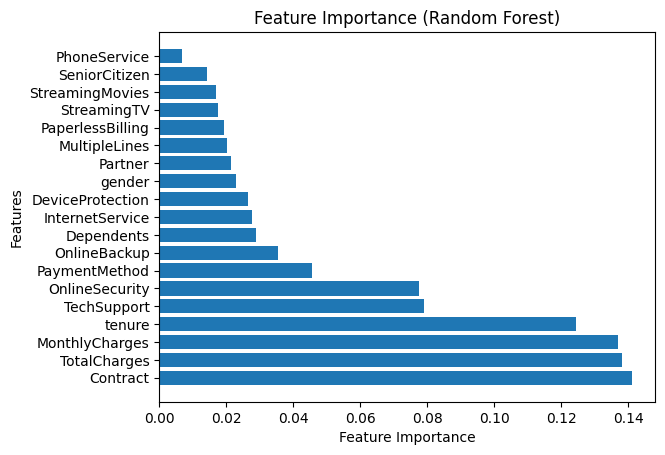

In [ ]:
import matplotlib.pyplot as plt

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

**To Do**
1. implementing Hyperparameter Tuning
2. Try Model Selection(For LR,SVM YOU need to do Feature Scaling)
3.Try Down Sampling
4. Try to add overfitting
5. Try Startified K-fold cross validation